In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
CT = gpd.read_file('ny.geojson')

<Axes: >

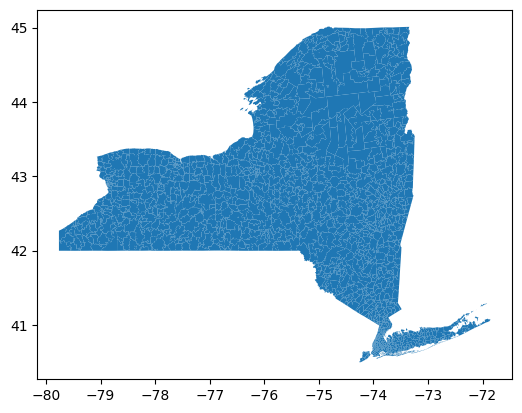

In [3]:
CT.plot()

In [4]:
zip_df = pd.read_csv('mlb-tu-data.csv', dtype={'Zip': object})

In [5]:
cols = zip_df.columns[2:]

In [6]:
cols

Index(['Toronto Blue Jays', 'Texas Rangers', 'Tampa Bay Rays',
       'St. Louis Cardinals', 'Seattle Mariners', 'San Francisco Giants',
       'San Diego Padres', 'Pittsburgh Pirates', 'Philadelphia Phillies',
       'Oakland Athletics', 'New York Yankees', 'New York Mets',
       'Minnesota Twins', 'Milwaukee Brewers', 'Miami Marlins',
       'Los Angeles Dodgers', 'Los Angeles Angels', 'Kansas City Royals',
       'Houston Astros', 'Detroit Tigers', 'Colorado Rockies',
       'Cleveland Guardians', 'Cincinnati Reds', 'Chicago White Sox',
       'Chicago Cubs', 'Boston Red Sox', 'Baltimore Orioles', 'Atlanta Braves',
       'Arizona Diamondbacks'],
      dtype='object')

In [7]:
zip_df = zip_df.rename(columns={"Zip":"ZIP_CODE"}).astype(str) 

In [8]:
zip_df

,ZIP_CODE,Washington Nationals,Toronto Blue Jays,Texas Rangers,Tampa Bay Rays,St. Louis Cardinals,Seattle Mariners,San Francisco Giants,San Diego Padres,Pittsburgh Pirates,...,Detroit Tigers,Colorado Rockies,Cleveland Guardians,Cincinnati Reds,Chicago White Sox,Chicago Cubs,Boston Red Sox,Baltimore Orioles,Atlanta Braves,Arizona Diamondbacks
0,6390,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,10001,0.76%,0.47%,0.09%,0.28%,0.28%,0.38%,0.76%,0.19%,0.38%,...,0.28%,0.38%,0.09%,0.09%,0.09%,2.18%,2.75%,0.76%,0.57%,0.09%
2,10002,1.15%,0.77%,0.10%,0.38%,0.19%,0.10%,0.77%,0.58%,0.48%,...,0.29%,0.48%,0.29%,0.10%,0.19%,1.53%,3.07%,2.11%,0.48%,0.19%
3,10003,1.33%,0.75%,0.58%,0.33%,0.08%,1.08%,1.74%,1.24%,0.33%,...,nan,0.83%,0.25%,0.25%,0.75%,1.57%,5.47%,0.99%,0.91%,0.50%
4,10004,1.02%,1.52%,0.51%,2.03%,0.51%,0.51%,1.02%,0.51%,0.51%,...,0.51%,1.52%,1.52%,0.51%,1.02%,5.08%,3.55%,0.51%,0.51%,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1825,14901,1.61%,4.84%,nan,3.23%,3.23%,4.84%,1.61%,nan,4.84%,...,1.61%,nan,1.61%,nan,nan,3.23%,8.06%,9.68%,nan,nan
1826,14902,nan,nan,nan,nan,nan,nan,nan,nan,nan,...,nan,nan,nan,nan,nan,nan,42.86%,14.29%,nan,nan
1827,14903,2.46%,4.10%,1.64%,2.46%,0.82%,0.82%,1.64%,1.64%,3.28%,...,5.74%,nan,5.74%,nan,nan,0.82%,9.02%,8.20%,0.82%,nan
1828,14904,1.74%,5.22%,nan,3.48%,nan,nan,nan,nan,5.22%,...,1.74%,1.74%,2.61%,nan,nan,0.87%,13.04%,12.17%,4.35%,0.87%


In [9]:
zip_df = zip_df.apply(lambda x: x.str.rstrip('%'))

In [10]:
zip_df[cols] = zip_df[cols].astype('float')

In [11]:
zip_df['ZIP_CODE'] = zip_df['ZIP_CODE'].drop_duplicates()

In [12]:
joinedCT = CT.merge(zip_df, on="ZIP_CODE")

In [13]:
joinedCT

,ZIP_CODE,PO_NAME,STATE,POPULATION,POP_SQMI,SQMI,Shape_Length,Shape_Area,geometry,Washington Nationals,...,Detroit Tigers,Colorado Rockies,Cleveland Guardians,Cincinnati Reds,Chicago White Sox,Chicago Cubs,Boston Red Sox,Baltimore Orioles,Atlanta Braves,Arizona Diamondbacks
0,10001,New York,NY,30787.0,47364.62,0.65,0.072254,0.000178,"MULTIPOLYGON (((-74.01068 40.75104, -74.01056 ...",0.76,...,0.28,0.38,0.09,0.09,0.09,2.18,2.75,0.76,0.57,0.09
1,10002,New York,NY,81262.0,71282.46,1.14,0.084660,0.000315,"MULTIPOLYGON (((-73.99759 40.71406, -73.99753 ...",1.15,...,0.29,0.48,0.29,0.10,0.19,1.53,3.07,2.11,0.48,0.19
2,10003,New York,NY,55510.0,99125.00,0.56,0.059762,0.000155,"MULTIPOLYGON (((-73.99696 40.73143, -73.99661 ...",1.33,...,NaN,0.83,0.25,0.25,0.75,1.57,5.47,0.99,0.91,0.50
3,10004,New York,NY,5357.0,10301.92,0.52,0.123589,0.000144,"MULTIPOLYGON (((-74.04725 40.69082, -74.04725 ...",1.02,...,0.51,1.52,1.52,0.51,1.02,5.08,3.55,0.51,0.51,NaN
4,10005,New York,NY,6542.0,93457.14,0.07,0.021853,0.000019,"MULTIPOLYGON (((-74.01188 40.70656, -74.01148 ...",1.08,...,0.65,1.08,0.22,NaN,1.08,1.08,5.19,0.43,0.65,0.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1609,14898,Woodhull,NY,1635.0,28.73,56.90,0.818591,0.016027,"MULTIPOLYGON (((-77.52170 42.01765, -77.52161 ...",nan,...,NaN,NaN,NaN,NaN,NaN,NaN,66.67,NaN,NaN,NaN
1610,14901,Elmira,NY,15338.0,420.56,36.47,0.897829,0.010274,"MULTIPOLYGON (((-76.83346 42.10562, -76.83343 ...",1.61,...,1.61,NaN,1.61,NaN,NaN,3.23,8.06,9.68,NaN,NaN
1611,14903,Elmira,NY,7534.0,329.43,22.87,0.489486,0.006450,"MULTIPOLYGON (((-76.95415 42.12358, -76.95408 ...",2.46,...,5.74,NaN,5.74,NaN,NaN,0.82,9.02,8.20,0.82,NaN
1612,14904,Elmira,NY,15489.0,2770.84,5.59,0.266178,0.001576,"MULTIPOLYGON (((-76.84743 42.07228, -76.84663 ...",1.74,...,1.74,1.74,2.61,NaN,NaN,0.87,13.04,12.17,4.35,0.87


<Axes: >

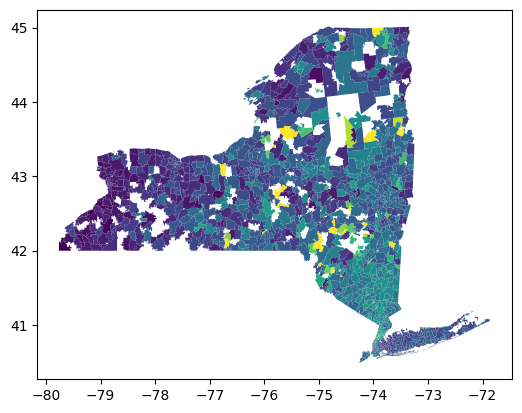

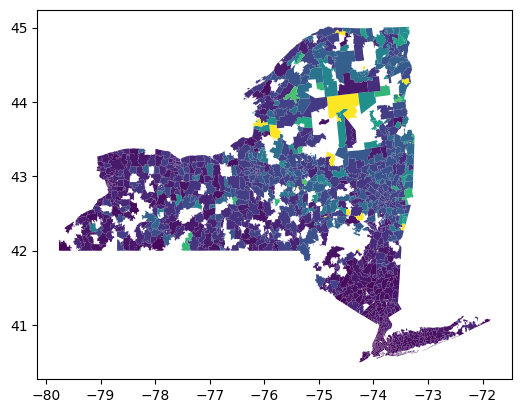

In [14]:
joinedCT.plot(column='New York Yankees')
joinedCT.plot(column='Boston Red Sox')

In [15]:
joinedCT['percentDiff_nyc_bos'] = joinedCT['New York Yankees'] - joinedCT['Boston Red Sox']

<Axes: >

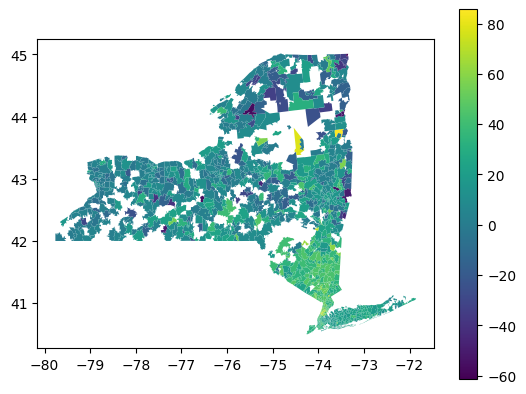

In [16]:
joinedCT.plot(column='percentDiff_nyc_bos', legend=True) #negative more NYC

In [17]:
joinedCT['Max'] = joinedCT[joinedCT.columns[10:]].idxmax(axis=1)

In [18]:
joinedCT['Max'].value_counts()

Max
New York Yankees         741
New York Mets            396
Toronto Blue Jays        163
Boston Red Sox           154
Pittsburgh Pirates        46
Cleveland Guardians       21
Tampa Bay Rays            16
Baltimore Orioles         14
Philadelphia Phillies     14
Miami Marlins              5
Texas Rangers              5
Detroit Tigers             5
Chicago Cubs               4
St. Louis Cardinals        3
Los Angeles Dodgers        3
Cincinnati Reds            3
Seattle Mariners           3
Chicago White Sox          2
Minnesota Twins            2
Los Angeles Angels         2
Atlanta Braves             2
Houston Astros             2
San Francisco Giants       2
Milwaukee Brewers          1
Arizona Diamondbacks       1
San Diego Padres           1
Name: count, dtype: int64

<Axes: >

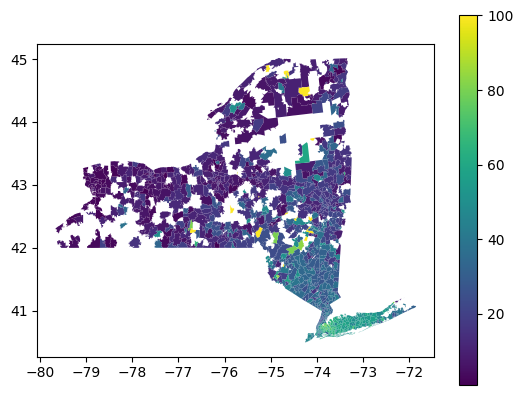

In [19]:
joinedCT.plot(column='New York Mets', legend=True)

<Axes: >

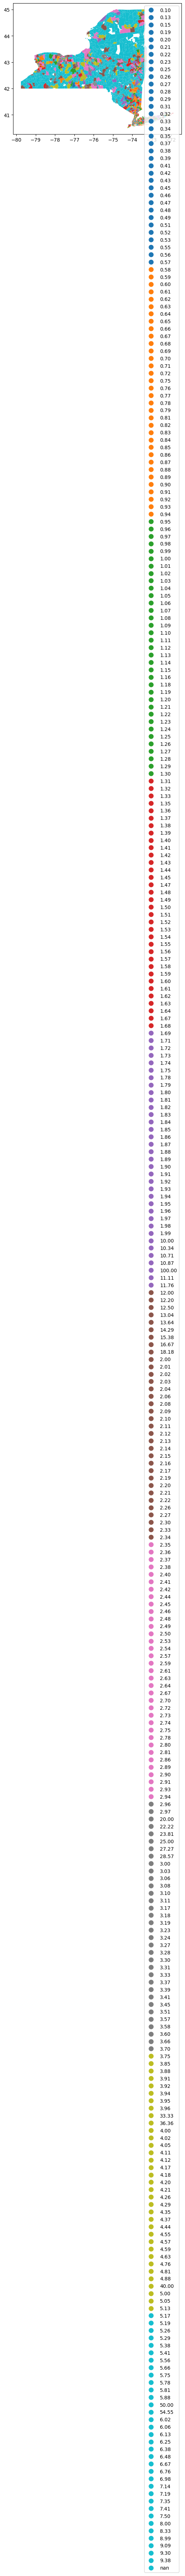

In [20]:
joinedCT.plot(column='Washington Nationals', legend=True)

<Axes: >

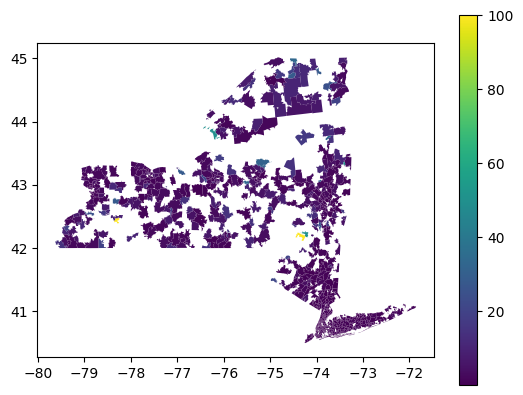

In [21]:
joinedCT.plot(column='Tampa Bay Rays', legend=True)

In [23]:
joinedCT.to_file('merged.geojson', driver='GeoJSON')